In [1]:
import assemblyfire 
from assemblyfire.topology import simplex_counts_consensus, simplex_counts_union, simplex_counts_core,\
simplex_counts_intersection, simplex_counts_core_vs_intersection


In [2]:
#Load consensus assembly
fn="/Users/egassant/Documents/plasticity.nosync/assemblies_simmat.h5"

#Load consensus assembly
consensus_assemblies, _ = assemblyfire.utils.load_consensus_assemblies_from_h5(fn, prefix="consensus")

In [3]:
#Load very basic connectivity matrix and gids just for testing.  This can be ignored and extracted directly from the fn
import numpy as np
import pandas as pd
path_matrix="/Users/egassant/Documents/plasticity.nosync/matrix_O1/"
circuit="O1"
column=2
mat=np.load(path_matrix+"matrix_{0}_col{1}.npy".format(circuit,column))
neuron_data=pd.read_pickle(path_matrix+"neuron_data_{0}_col{1}".format(circuit,column))
all_gids=neuron_data.index
depths=None
mtypes=None
network=assemblyfire.NetworkAssembly(mat,all_gids,depths,mtypes)

# Computing simplex counts and plotting

### Simplex counts by cluster vs. average random control

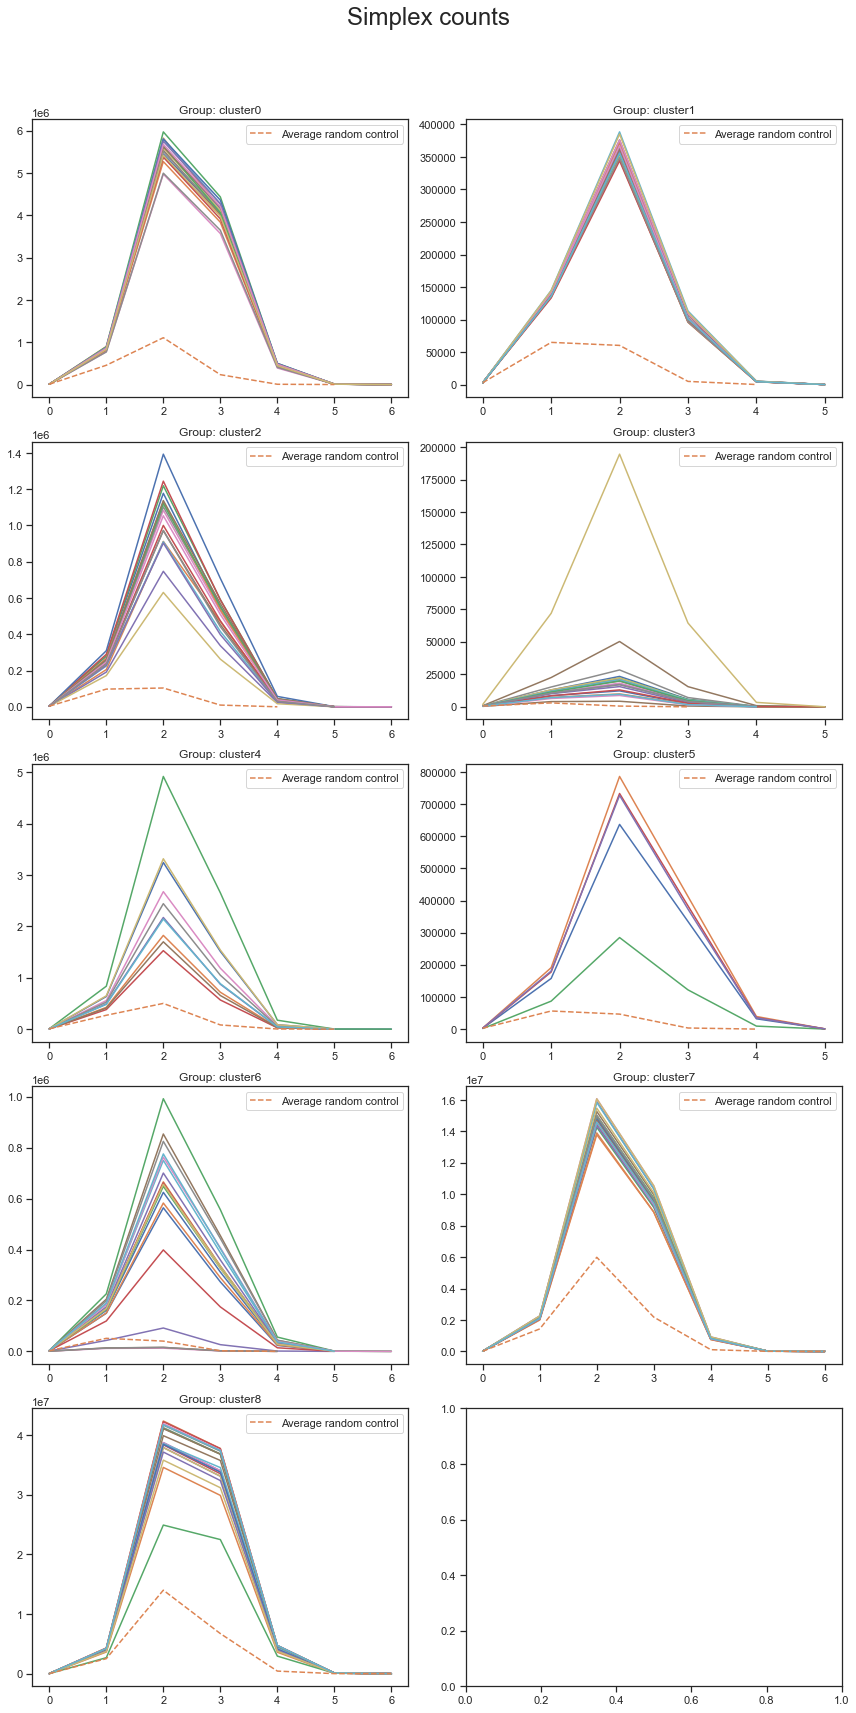

In [4]:
%matplotlib inline
simplex_counts,controls=simplex_counts_consensus(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Average random control"])
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Union vs. random control 

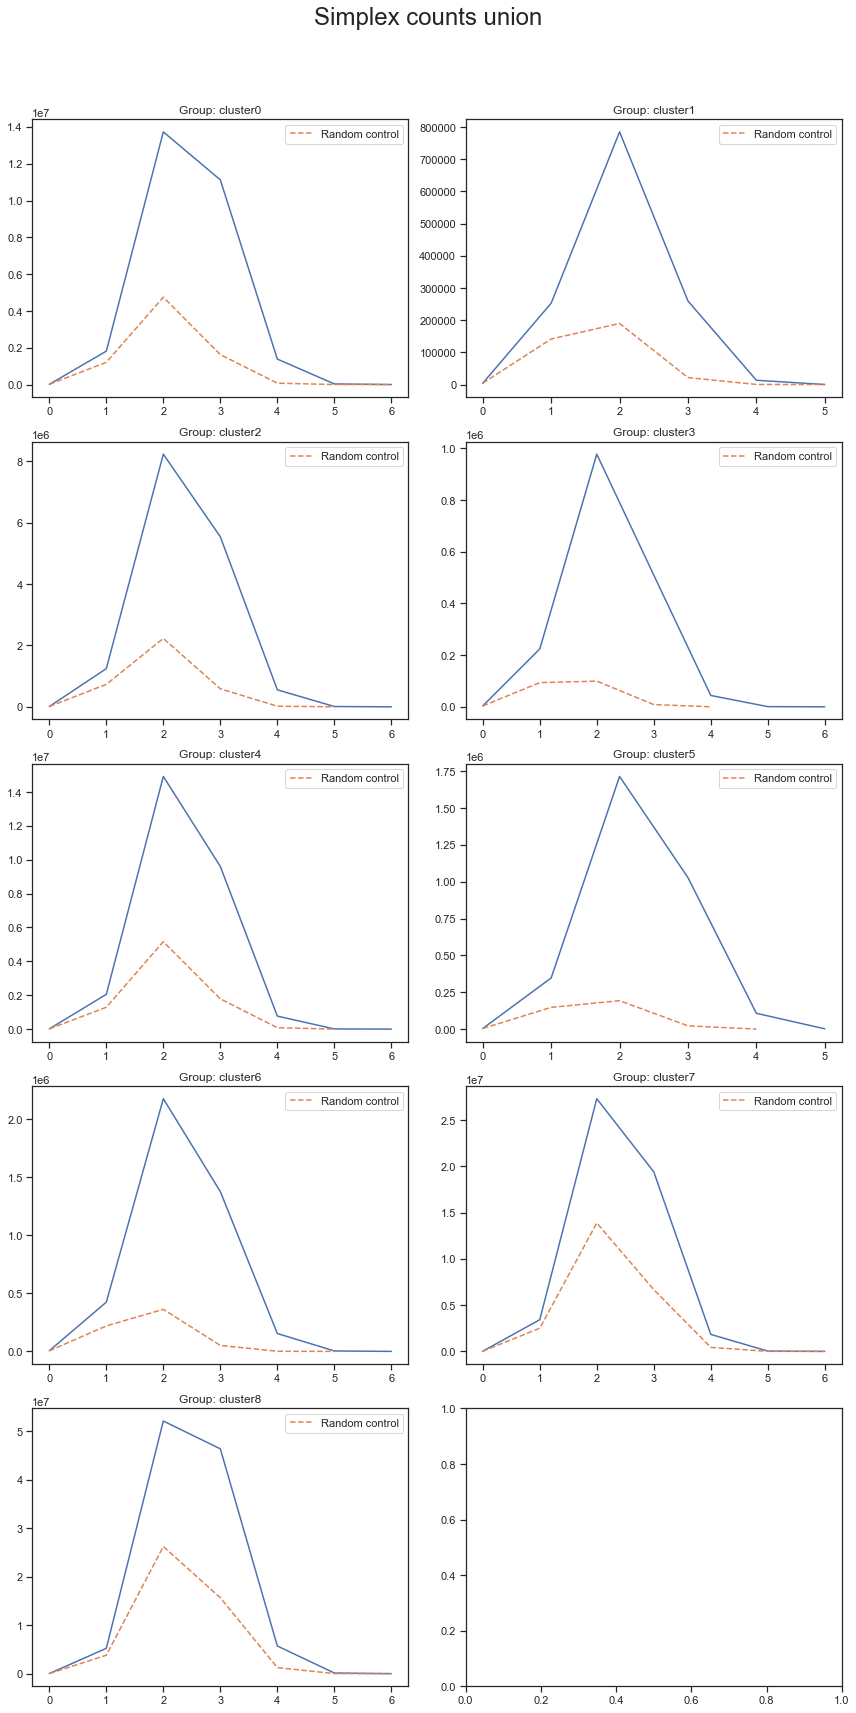

In [5]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_union(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts union")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. random control within union 

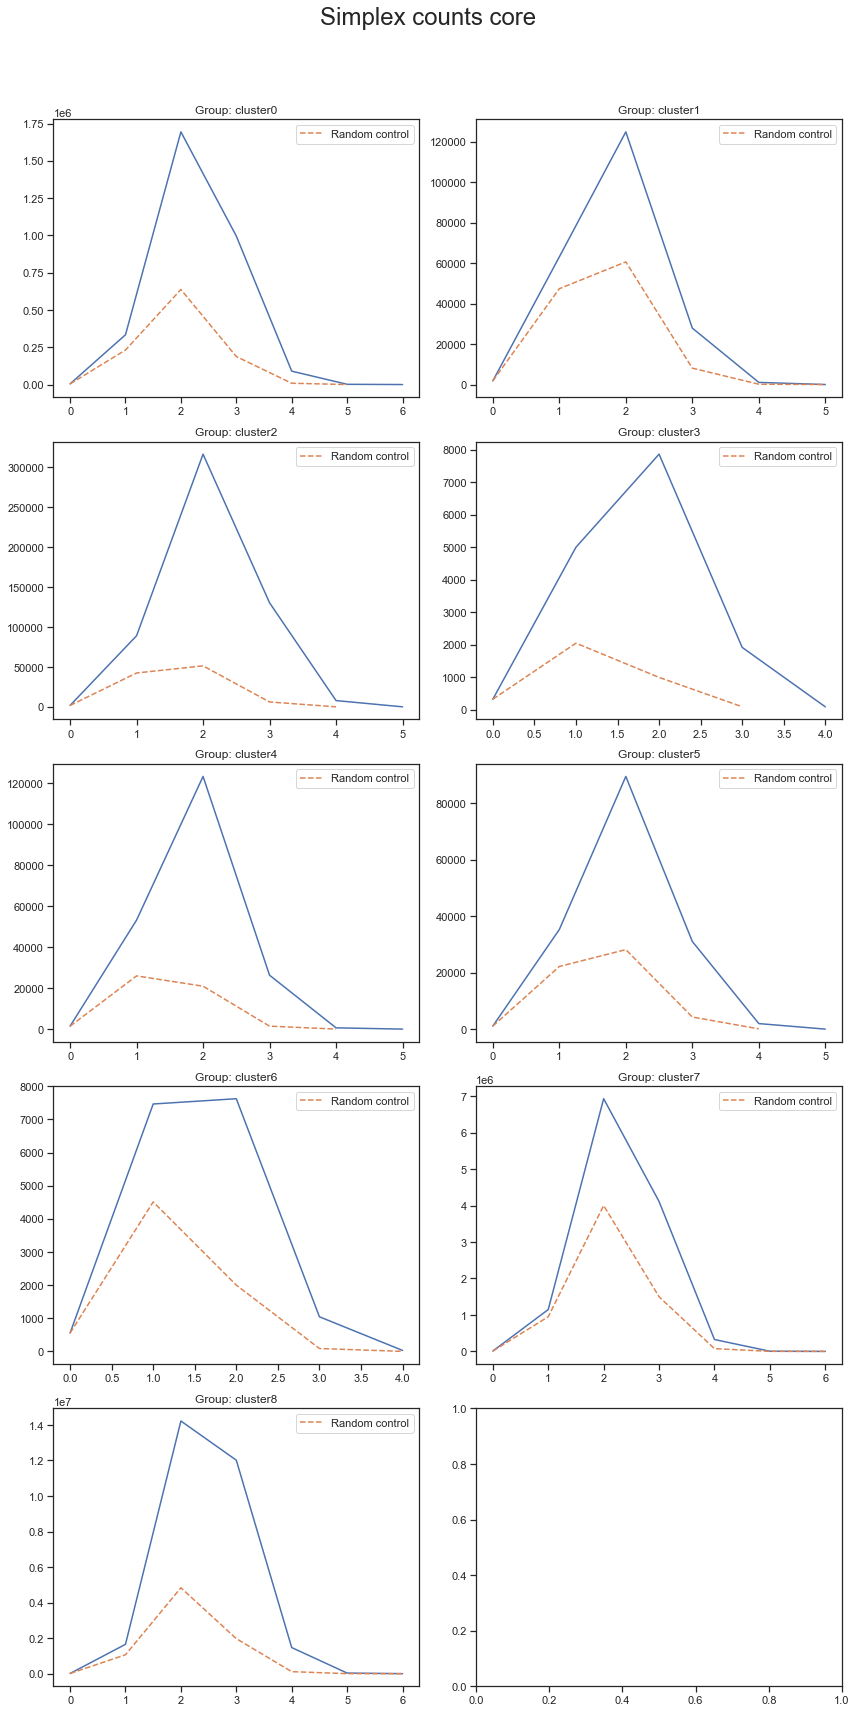

In [6]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_core(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts core")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Intersection vs. random control within union 

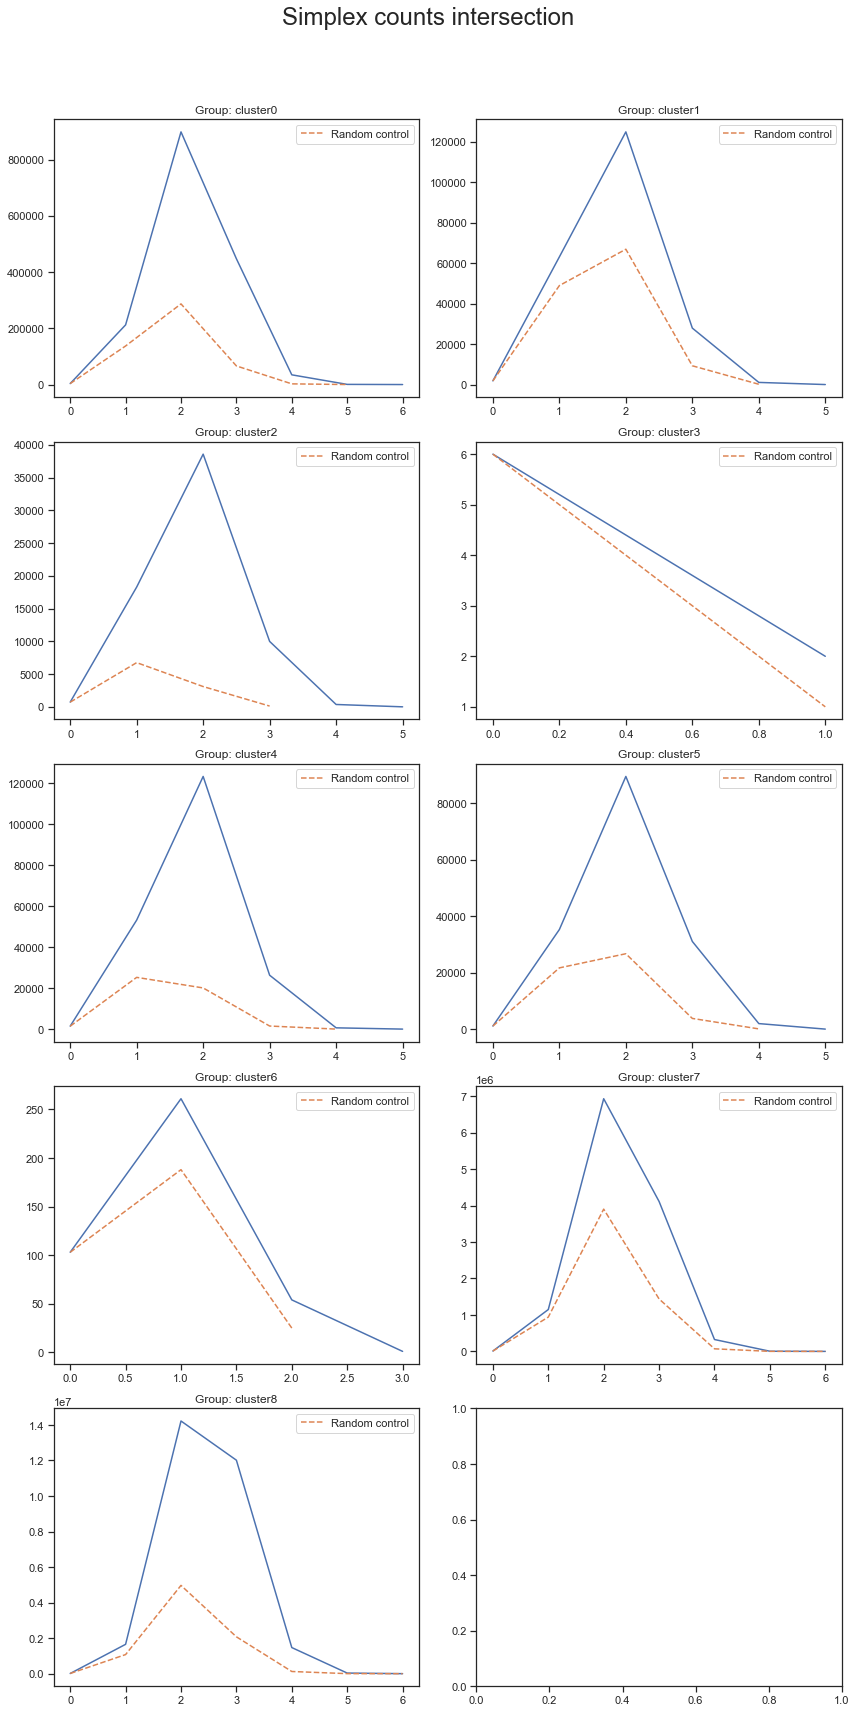

In [7]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_intersection(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Random control"], title="Simplex counts intersection")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. Intersection 

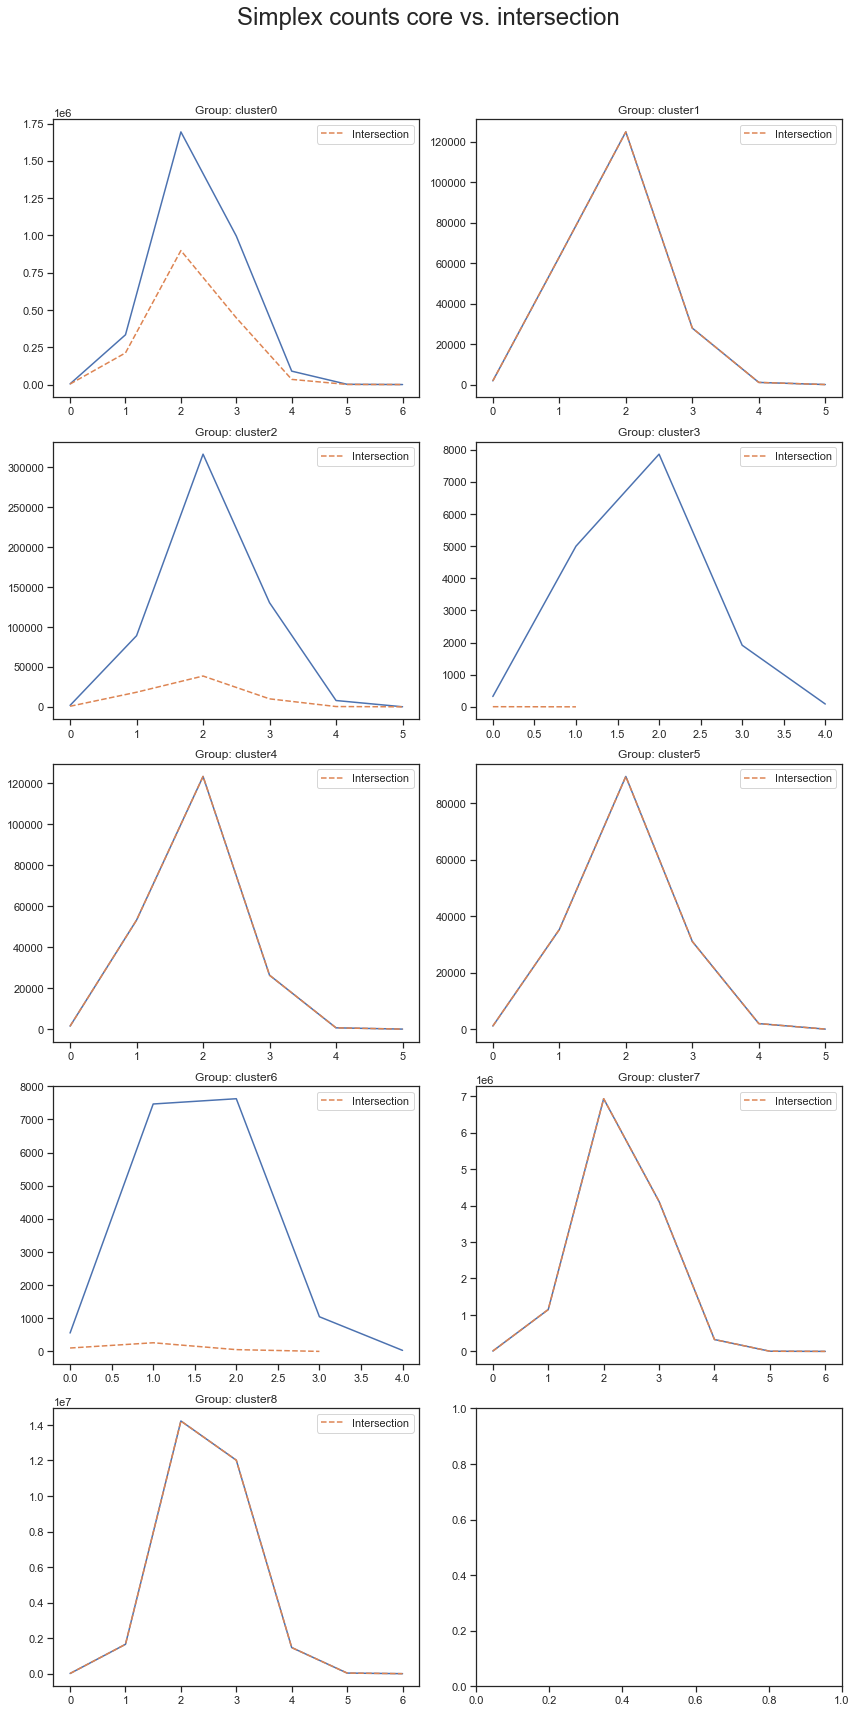

In [8]:
%matplotlib inline 
simplex_counts_core,simplex_counts_intersection=simplex_counts_core_vs_intersection(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts_core, [simplex_counts_intersection],["Intersection"], title="Simplex counts core vs. intersection")
#Add save_fig=True, path_fig=path to parameters to save figure to path